# Properties of apps with ≥ 1M installs

In [2]:
dataset_meta = DatasetMeta(SchemaName.PLAY_STORE, PlayStoreDatasetName.DATASET1)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,app_id,name,category,rating,reviews,app_size_kb,installs,type,price,content_rating,last_updated,min_android_ver
1,1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,2018,4
2,2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,1000000,Free,0.0,Everyone,2018,4
3,3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,10000000,Free,0.0,Everyone,2018,4
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,1000000,Free,0.0,Everyone,2018,4
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,10000,Free,0.0,Everyone,2017,2


In [3]:
actions_lst = [
    GroupAction(grouped_column=Column('installs'), aggregated_column=Column('app_id'), 
                aggregation_function=AggregationFunction.COUNT),
    GroupAction(grouped_column=Column('installs'), aggregated_column=Column('rating'), 
                aggregation_function=AggregationFunction.AVERAGE),
    BackAction(), 
    BackAction(),
    FilterAction(filtered_column=Column('installs'), filter_operator=FilterOperator.GREATER, filter_term=1000000),
    GroupAction(grouped_column=Column('min_android_ver'), aggregated_column=Column('app_id'), 
                aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    GroupAction(grouped_column=Column('type'), aggregated_column=Column('app_id'), 
                aggregation_function=AggregationFunction.COUNT),
    GroupAction(grouped_column=Column('installs'), aggregated_column=Column('rating'), 
                aggregation_function=AggregationFunction.AVERAGE),
    BackAction(),
    BackAction(),
    GroupAction(grouped_column=Column('installs'), aggregated_column=Column('app_id'), 
                aggregation_function=AggregationFunction.COUNT),
    ]
    
actions_simulator = ActionsSimulator(dataset=dataset)
action_execution_result_lst = actions_simulator.run_actions(actions_lst)

### Session Tree:

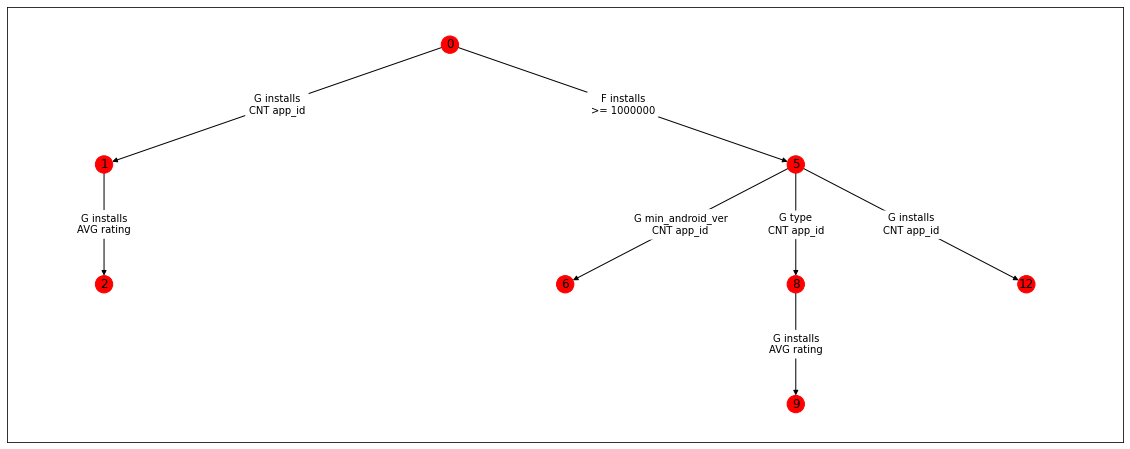

In [4]:
draw_nx_display_tree(action_execution_result_lst)

### Query 1: <span style="color:blue;">Group by installs CNT(app_id)</span>

In [5]:
display(prepare_display(action_execution_result_lst, 0))

,app_id
installs,
1000,1314
10000,1816
1000000,2795
10000000,1469
1000000000,233


### Query 2: <span style="color:DimGray">Group by installs CNT(app_id) AND</span> <span style="color:blue;">Group by installs AVG(rating)</span>

In [6]:
display(prepare_display(action_execution_result_lst, 1))

,app_id,rating
installs,,
1000,1314,4.20
10000,1816,4.03
1000000,2795,4.17
10000000,1469,4.29
1000000000,233,4.40


### Query 5: <span style="color:blue;">Filter installs >= 1000000</span>

In [7]:
display(prepare_display(action_execution_result_lst, 4))

,app_id,name,category,rating,reviews,app_size_kb,installs,type,price,content_rating,last_updated,min_android_ver
2,2,Coloring book moana,ART_AND_DESIGN,3.90,967,14000,1000000,Free,0.00,Everyone,2018,4
3,3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8700,10000000,Free,0.00,Everyone,2018,4
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2800,1000000,Free,0.00,Everyone,2018,4
7,7,Infinite Painter,ART_AND_DESIGN,4.10,36815,29000,1000000,Free,0.00,Everyone,2018,4
8,8,Garden Coloring Book,ART_AND_DESIGN,4.40,13791,33000,1000000,Free,0.00,Everyone,2017,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7611,7611,Castle Clash: RPG War and Strategy FR,FAMILY,4.70,376223,24000,1000000,Free,0.00,Everyone,2018,4
7615,7615,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,4.20,5775,4900,1000000,Free,0.00,Everyone,2018,4
7616,7616,HTC Sense Input - FR,TOOLS,4.00,885,8000,1000000,Free,0.00,Everyone,2015,5
7622,7622,News Minecraft.fr,NEWS_AND_MAGAZINES,3.80,881,2300,1000000,Free,0.00,Everyone,2014,1


### Query 6: <span style="color:DimGray">Filter installs >= 1000000 AND</span> <span style="color:blue;">Group by min_android_ver CNT(app_id)</span>

In [8]:
display(prepare_display(action_execution_result_lst, 5))

,app_id
min_android_ver,
1,32
2,626
3,108
4,3380
5,314
6,21
7,14
8,2


### Query 8: <span style="color:DimGray">Filter installs >= 1000000 AND</span> <span style="color:blue;">Group by type CNT(app_id)</span>

In [9]:
display(prepare_display(action_execution_result_lst, 7))

,app_id
type,
Free,4396
Paid,101


### Query 9: <span style="color:DimGray">Filter installs >= 1000000 AND Group by type CNT(app_id) AND</span> <span style="color:blue;">Group by installs AVG(rating)</span>

In [10]:
display(prepare_display(action_execution_result_lst, 8))

app_id  rating
type installs                  
Paid 1000000        100    4.45
     10000000         1    4.60
Free 1000000       2695    4.16
     10000000      1468    4.29
     1000000000     233    4.40

### Query 12: <span style="color:DimGray">Filter installs >= 1000000 AND</span> <span style="color:blue;">Group by installs CNT(app_id)</span>

In [11]:
display(prepare_display(action_execution_result_lst, 11))

,app_id
installs,
1000000,2795
10000000,1469
1000000000,233
